# Data Cleaning [데이터 정제]

여기서 **clean**은 깨끗이 닦아 없애다라기보다는 **정리하다**라는 뜻

### 목차
1. 결측치 처리
2. Scaling[데이터 범위 조정] & Normalization [정규화]
3. 시계열 데이터 변환
4. 문자 encoding
5. 입력 오탈자 수정

## 1. 결측치 처리 (Data Cleaning: 1 of 5)

### 칼럼 별 결측치 개수 구하기
```python
# 개수
missing_values_count = nfl_data.isnull().sum() # 각 칼럼 별 NA 개수

# 비율 (전체 데이터에 대한)
total_cells = np.product(nfl_data.shape) # np.prod 또는 np.product: 배열 원소간 곱 계산 범용 함수 (DataFrame.shape와 함께 총 데이터 수(행 * 열)를 구할 수 있음)
total_missing = missing_values_count.sum() # 모든 NA 총 개수

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
```
### ※ 왜 데이터 결측치가 발생했는지 알아내야 한다.
→ 경험과 지식에 의한 `data intuition` 필요

Ex. Q.해당 결측치는 기록이 안된 것일 뿐일까? 아니면 그저 존재하지 않는 값일까?
→ 전자는 `Imputation`으로 '기록되었다면 어떤 값인지 추정해야 되고, 후자는 더 이상 고려하지 않아도 되는 부분이다.

### Drop 결측치
권장하지 않음
- 아주 급할 때
- 신경 쓰지 않을 칼럼이 존재할 때
```python
nfl_data.dropna() # default(axis=0) - drop all NA rows
```
### Fill NA automatically (Replace)
```python
subset_nfl_data.fillna(0) # 0으로 대체
subset_nfl_data.fillna(method='bfill', axis=0) # NA값이 존재할 경우 같은 칼럼 다음 row의 값으로 대체
```

## 2. Scaling & Nomalization (Data Cleaning: 2 of 5)

기본 세팅
```python
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
## = sklearn.preprocessing.MinMaxScaler()

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
```

### Scaling vs. Normalization 차이
> - `Scaling` : 데이터의 범위를 조정 (※ 데이터 분포 모양이 변하지 않음!)
- `Normalization` : 데이터 분포모양을 조정 (관측값을 조정)

### Scaling
데이터를 특정 범위(ex. 0-100 또는 0-1)로 조정하는 것
- Support Vector Machines (SVM)
- K-Nearest Neighbors (KNN)

※ original data에서 1의 수치의 중요성이 사소할 만큼 작게 된다.

Scaling은 서로 다른 numerical 변수를 동일한 범위 내에서 비교하기에 좋다. (시각화에서도 데이터 분포 정도 비교를 쉽게 할 수 있다.)

```python
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])
```

> - SVM: 기계 학습의 분야 중 하나로 패턴 인식, 자료 분석을 위한 지도 학습 모델이며, 주로 분류와 회귀 분석을 위해 사용한다.  
- KNN: 분류나 회귀에 사용되는 비모수 방식.  
(※ 비모수 방식: 통계학에서 모수에 대한 가정을 전제로 하지 않고 모집단의 형태에 관계없이 주어진 데이터에서 직접 확률을 계산하여 통계학적 검정을 하는 분석)

### Normalization
관측값이 정규 분포(bell curve)를 이루도록 데이터를 조정하는 것. (= Gaussian distribution)
> - linear discriminant analysis (LDA) [선형판별분석]: 데이터 분포를 학습해 결정경계를 만들어 데이터를 분류하는 모델
- Gaussion naive Bayes: 정규 분포를 따르는 확률을 이용해서 가장 합리적인 예측값을 계산하는 방식
(※ 보통 Gaussian 이라는 단어가 들어가면 'nomality' 즉, 정규성을 따른다고 보면 됨)
- box-cox transformation: 로그 변환(log transformation)과 거듭곱 변환(power transformation) 둘 다 포함하는 유용한 변환

```python
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)
```

※ exponential distribution[지수 분포]: 사건이 발생하기까지 경과 시간에 대한 연속확률분포 (사건이 일어나고 다음 사건이 일어나기까지 걸리는 시간을 나타내는 분포)

In [1]:
# modules we'll use
import pandas as pd
import numpy as np
 
# for Box-Cox Transformation
from scipy import stats
 
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
## = sklearn.preprocessing.MinMaxScaler()
 
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


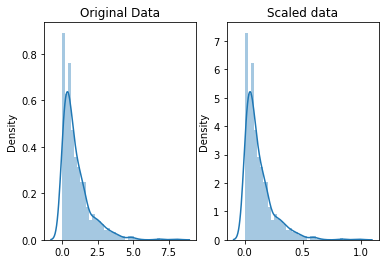

x축, y축 수치가 바뀜, 분포 모양은 유지


In [6]:
# Scaling
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()
print('x축, y축 수치가 바뀜, 분포 모양은 유지')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


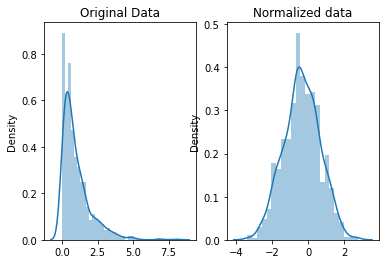

x축, y축 수치가 바뀜, 분포 모양 바뀜 (bell curve)


In [7]:
# Normalization
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()
print('x축, y축 수치가 바뀜, 분포 모양 바뀜 (bell curve)')

## 3. Parsing Dates (Data Cleaning: 3 of 5)

기본 세팅
```python
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("../input/landslide-events/catalog.csv")

# set seed for reproducibility
np.random.seed(0)
```

### 데이터 타입 확인
```python
# pandas
print(landslides['date'].head())
>>> Name: date, dtype: object

# numpy
landslides['date'].dtype
>>> dtype('O')
```
object 또는 O는 대부분 str 또는 그외의 데이터 타입을 가질 때 표기방법이다. python에서, 특히 pandas 라이브러리를 사용할 경우 dates에 대한 dtpye은 `datetime64`이다.

### datetime 타입으로 변환시키기 (parsing dates)

날짜로 가능한 부분

|||
|---|---|
|%d|day|
|%m|month|
|%y|2-digit year|
|%Y|4-digit year|

Ex:
- 1/17/07 has the format `%m/%d/%y`
- 17-1-2007 has the format `%d-%m-%Y`

```python
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

# infer_datetime_format=True 날짜시간 포맷 추정해서 파싱하기
# ※ 단, 추정불가능한 경우가 있고, 직접 format 지정하는 것보다 느림
landslides['date_parsed'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)
```

### 변환시킨 데이터와 상호작용하기
1. 몇일 인지 조회하기
```python
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()
```
2. 제대로 parse 됐는지 Plot으로 확인하기 (결측치 제외)
```python
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()
# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)
```

In [ ]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

3. 만약 제대로 parse 되어 있지 않았다면?
- 잘못된 형식으로 데이터 입력
- 결측치 등
```python
date_lengths = earthquakes.Date.str.len() # Date columns str dtype의 길이를 분석 (Series)
date_lengths.value_counts() # 같은 데이터 값 끼리 묶어 몇 개씩 존재하는 지 분석
```
따라서 잘못된 형식의 해당 데이터 index 번호를 찾아 형식을 통일 시켜야 함
※ indexes = indices (복수형)
```python
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]
```

## 4. Character Encodings (Data Cleaning: 4 of 5)


기본 세팅 (핵심: `chardet`)
```python
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import chardet

# set seed for reproducibility
np.random.seed(0)
```

### Encoding이란?
이진 byte 단위로 이루어진 원 데이터를 특정한 규칙으로 mapping하여 나타내는 방식.  
`python3`는 **UTF-8**를 기본 텍스트 encoding타입으로 지정하였으므로, 파일을 저장할 때 되도록 UTF-8로 저장하길 권고한다.  
※ 참고로 이진(binary) byte 타입의 변수를 만드는 방법은 *b'\xa7A\xa6n'* 처럼 앞아 `b`를 사용하면 된다.

### chardet 라이브러리 사용하기
만약 UTF-8로 ecoding되어 있지 않은 파일을 읽어오게 된다면 자칫 데이터가 손상된 채로 사용될 수 있다. (다른 encoding방식은 English이외 언어에 대해 unkwown처리하기 때문)

그러므로 어떤 파일을 읽어올 때 어떤 방식의 encoding을 취해야 되는 지 알아낼 필요가 있는데 이때 도움을 주는 라이브러리가 chardet이다.
```python
# look at the first ten thousand bytes to guess the character encoding
with open("../input/kickstarter-projects/ks-projects-201801.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)
```
어떤 타입으로 encoding해야 되는지 신뢰도로 나타내 준다.
```python
# read in the file with the encoding detected by chardet
kickstarter_2016 = pd.read_csv("../input/kickstarter-projects/ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()
```
※ 만약 파일을 불러오는 데 실패하였다면 read하는 byte수를 10000 → 100000으로 늘려보도록 하자
  

### UTF-8로 encoding하여 저장하기
```python
# save our file (will be saved as UTF-8 by default!)
kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")

# if you want to save in different format:
kickstarter_2016.to_csv("ks-projects-201801-utf8.csv", encoding='Windows-1252')
```


## 5. Incosistent Data Entry (Data Cleaning: 5 of 5)

기본 세팅 (핵심: `fuzzywuzzy`)
```python
# modules we'll use
import pandas as pd
import numpy as np

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# read in all our data
professors = pd.read_csv("../input/pakistan-intellectual-capital/pakistan_intellectual_capital.csv")

# set seed for reproducibility
np.random.seed(0)
```

### 예비 전처리 하기 (대소문자 처리, 공백 처리)
직접 일일히 하는 것보다 더 빠른 방법으로 특정 column의 데이터 값을 일관성 있게 만들 수 있다.

1. 먼저 가능한 모든 데이터 값을 sort한다.
```python
    # get all the unique values in the 'Country' column
    countries = professors['Country'].unique()

    # sort them alphabetically and then take a closer look
    countries.sort()
    countries
```
sort해보면 `'Germany'` & `'germany'`처럼 대소문자가 다른 경우도 있고, `' New Zealand'` & `'New Zealand'`처럼 띄어쓰기가 포함된 경우가 있다.

2. 소문자화 및 앞뒤 공백 제거 (`lower()`, `str.strip`)
```python
# convert to lower case
professors['Country'] = professors['Country'].str.lower()
# remove trailing white spaces
professors['Country'] = professors['Country'].str.strip()
```
> 내 생각: 만약 str을 빼고 `professors['Country'].strip()`라고만 하면 안되나?

3. `fuzzywuzzy`를 이용하여 중간 띄어쓰기 안된 부분 찾아내기

In [ ]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

# use the function we just wrote to replace close matches to "south korea" with "south korea"
replace_matches_in_column(df=professors, column='Country', string_to_match="south korea")